In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/t20-world-cup-2022/T20-world-cup-22.csv


![t20 world cup 2022](https://resources.pulse.icc-cricket.com/photo-resources/2022/10/15/bfd6b651-3313-484a-9a94-cd3deb4566c8/ICC-Men-s-T20-World-Cup-Captains-Image.jpg?width=2000&height=1125)

# About T20 World Cup:
**The T20 World Cup 2022 is an international cricket tournament organized by the International Cricket Council (ICC). It is a premier event in the world of cricket, featuring teams from various nations competing in the fast-paced and exciting T20 format.**

**First introduced in 2007, the T20 World Cup has gained immense popularity over the years, captivating cricket fans worldwide. The tournament showcases top cricketing talent from different countries, bringing together experienced players and rising stars on a global stage.**

**The T20 World Cup 2022 is set to be a thrilling and highly anticipated event, with matches being held in different venues across the host country. Cricket enthusiasts eagerly await the tournament to witness intense cricketing action, high-scoring matches, and breathtaking performances.**

**The tournament provides a platform for teams to showcase their skills, strategies, and team spirit in the T20 format, known for its fast-paced gameplay and explosive batting. It offers an opportunity for cricketing nations to compete for glory, national pride, and the chance to be crowned the T20 World Cup champions.**

**In addition to the on-field action, the T20 World Cup 2022 is expected to create a vibrant and festive atmosphere, with fans coming together to support their favorite teams and create an electric ambiance in the stadiums. The tournament serves as a celebration of cricket, uniting fans from diverse backgrounds and fostering a sense of camaraderie and sportsmanship.**

**As the T20 World Cup 2022 unfolds, cricket enthusiasts eagerly anticipate exhilarating contests, nail-biting finishes, and standout performances that will etch unforgettable memories in the history of the sport.**

**In conclusion, the T20 World Cup 2022 is a highly awaited cricket tournament that showcases the excitement and dynamism of the T20 format. It brings together teams from across the globe, offering a platform for thrilling cricketing battles and showcasing the talent and skill of the players. The tournament is set to captivate fans worldwide and leave a lasting impact on the world of cricket.**

In [2]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import os
import random
import math
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

# Data Collection:

In [3]:
#Loading Data
data = pd.read_csv("/kaggle/input/t20-world-cup-2022/T20-world-cup-22.csv")

In [4]:
data.head()

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   venue                   33 non-null     object 
 1   team1                   33 non-null     object 
 2   team2                   33 non-null     object 
 3   stage                   33 non-null     object 
 4   toss winner             30 non-null     object 
 5   toss decision           30 non-null     object 
 6   first innings score     30 non-null     float64
 7   first innings wickets   30 non-null     float64
 8   second innings score    30 non-null     float64
 9   second innings wickets  30 non-null     float64
 10  winner                  29 non-null     object 
 11  won by                  29 non-null     object 
 12  player of the match     29 non-null     object 
 13  top scorer              30 non-null     object 
 14  highest score           30 non-null     floa

In [6]:
data.describe()

,first innings score,first innings wickets,second innings score,second innings wickets,highest score
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,153.366667,6.866667,130.800000,6.233333,64.066667
std,30.440992,2.096521,25.511863,3.013571,17.264541
min,79.000000,2.000000,51.000000,0.000000,32.000000
25%,134.000000,5.250000,113.500000,5.000000,52.500000
50%,157.000000,7.500000,136.000000,6.000000,62.000000
75%,179.000000,8.000000,147.750000,9.000000,70.250000
max,205.000000,10.000000,170.000000,10.000000,109.000000


In [7]:
data.shape

(33, 17)

In [8]:
data.columns

Index(['venue', 'team1', 'team2', 'stage', 'toss winner', 'toss decision',
       'first innings score', 'first innings wickets', 'second innings score',
       'second innings wickets', 'winner', 'won by', 'player of the match',
       'top scorer', 'highest score', 'best bowler', 'best bowling figure'],
      dtype='object')

In [9]:
data.isnull().sum()

venue                     0
team1                     0
team2                     0
stage                     0
toss winner               3
toss decision             3
first innings score       3
first innings wickets     3
second innings score      3
second innings wickets    3
winner                    4
won by                    4
player of the match       4
top scorer                3
highest score             3
best bowler               3
best bowling figure       3
dtype: int64

# Data Cleaning:

In [10]:
data = data.dropna()
data.isnull().sum()

venue                     0
team1                     0
team2                     0
stage                     0
toss winner               0
toss decision             0
first innings score       0
first innings wickets     0
second innings score      0
second innings wickets    0
winner                    0
won by                    0
player of the match       0
top scorer                0
highest score             0
best bowler               0
best bowling figure       0
dtype: int64

# Data Preprocessing and Data Visualization:

# Analysis of Number of Matches Played in Each Venue:



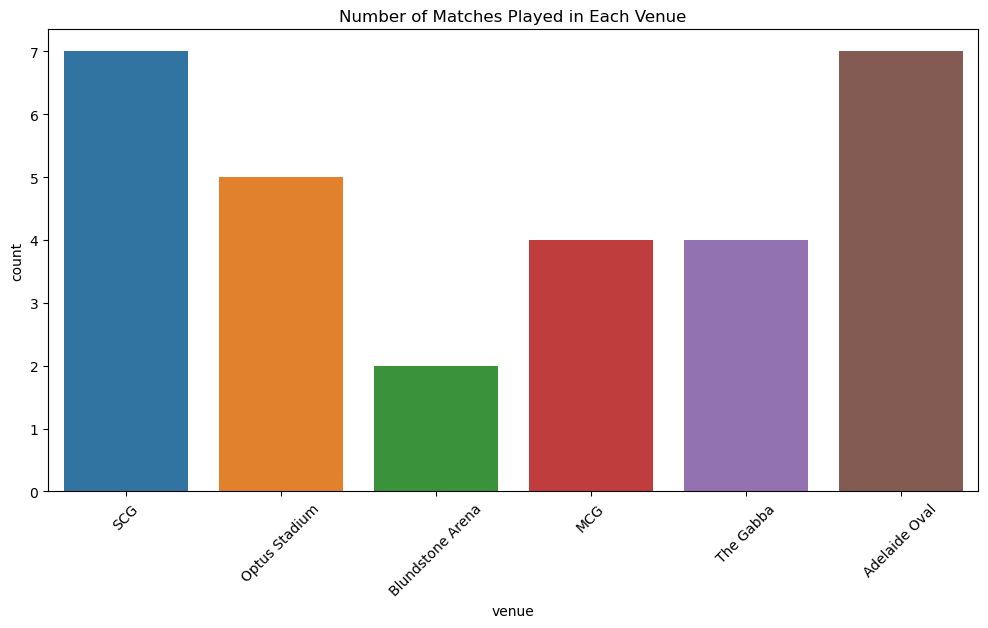

In [11]:
# Bar plot of the number of matches played in each venue
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='venue')
plt.xticks(rotation=45)
plt.title('Number of Matches Played in Each Venue')
plt.show()

# Observation:
**It is observed that the T20 World Cup 2022 witnessed the highest number of matches played at SCG, MCG, and Adelaide Oval.**

# Analysis of Team Performances

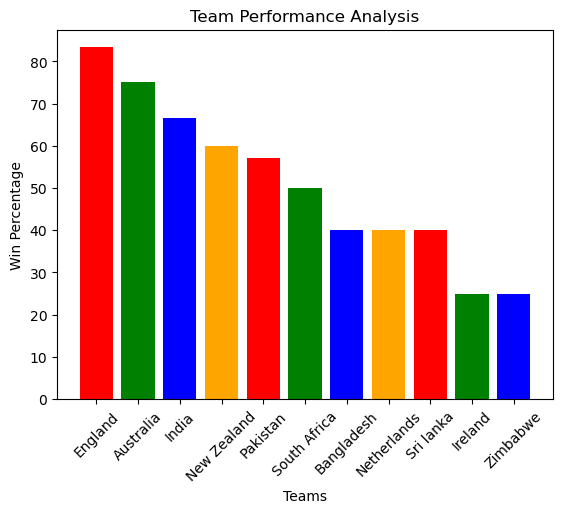

In [12]:
# Calculate the total number of matches played by each team
team_matches = data["team1"].value_counts() + data["team2"].value_counts()

# Calculate the number of matches won by each team
team_wins = data["winner"].value_counts()

# Calculate the win percentage for each team
team_win_percentage = (team_wins / team_matches) * 100

# Sort the teams by their win percentage in descending order
team_win_percentage = team_win_percentage.sort_values(ascending=False)

# Plot the bar chart
plt.bar(team_win_percentage.index, team_win_percentage.values, color=['red', 'green', 'blue', 'orange'])

# Customize the chart
plt.xlabel("Teams")
plt.ylabel("Win Percentage")
plt.title("Team Performance Analysis")
plt.xticks(rotation=45)

# Display the chart
plt.show()

# Observation:
**It is observed that the top-performing team in the T20 World Cup was England, while the low-performing teams were Ireland and Zimbabwe.**

# Analysis of Number of Matches Won by Each Team:



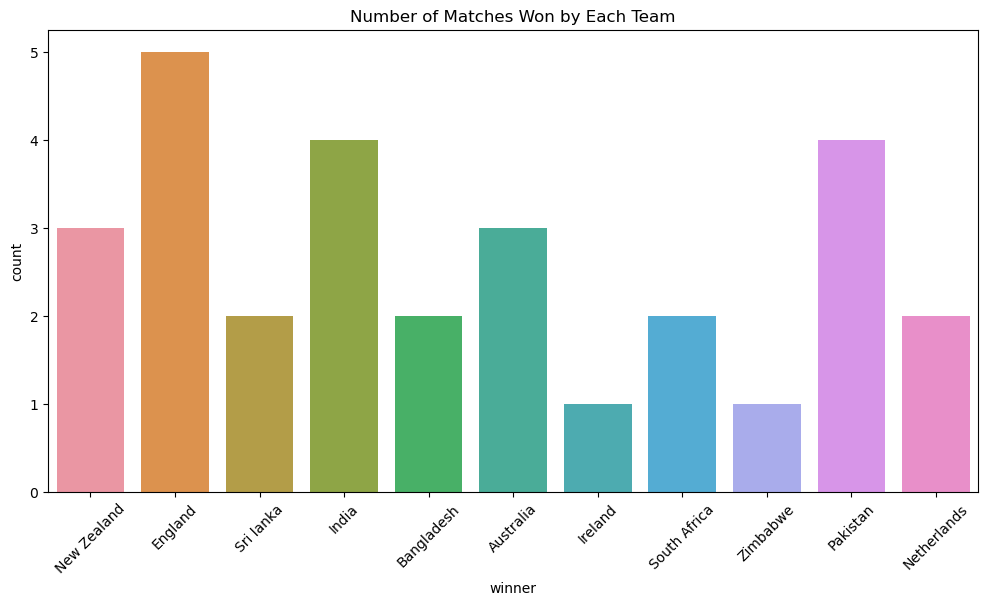

In [13]:
# Bar plot of the number of matches won by each team
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='winner')
plt.xticks(rotation=45)
plt.title('Number of Matches Won by Each Team')
plt.show()

# Observation:
**It is observed that England emerged as the team with the most victories in the T20 World Cup 2022.**

# Analysis of Distribution of First and Second Innings Scores:



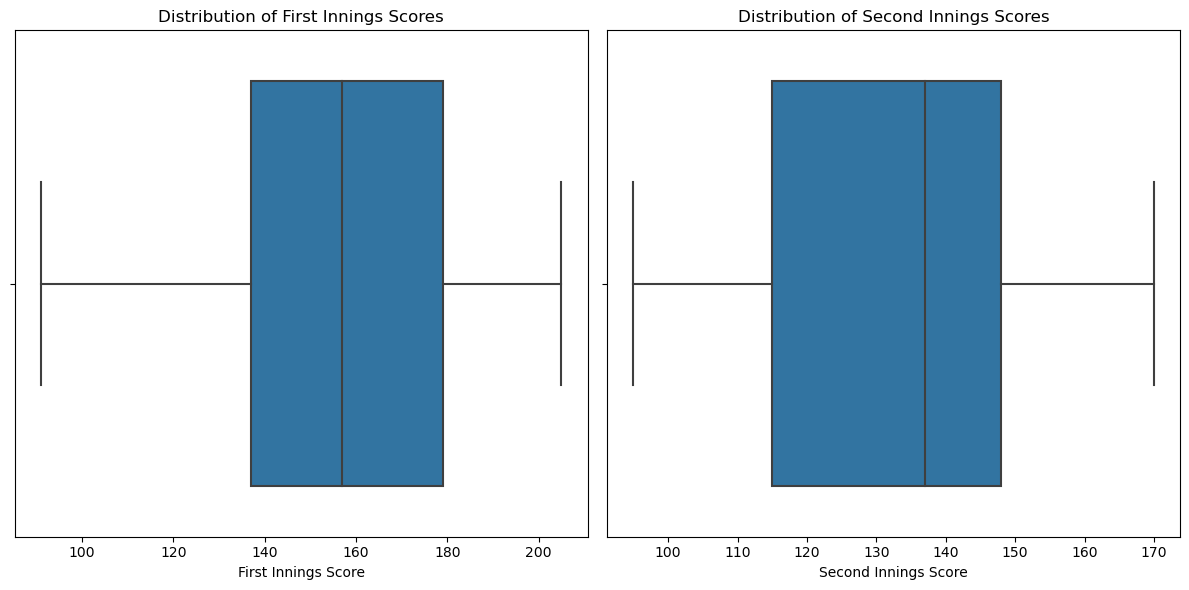

In [14]:
# Create subplots for side-by-side box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for First Innings Scores
sns.boxplot(data=data, x='first innings score', ax=axes[0])
axes[0].set_title('Distribution of First Innings Scores')
axes[0].set_xlabel('First Innings Score')

# Box plot for Second Innings Scores
sns.boxplot(data=data, x='second innings score', ax=axes[1])
axes[1].set_title('Distribution of Second Innings Scores')
axes[1].set_xlabel('Second Innings Score')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Analysis of First and Second Innings Scores:



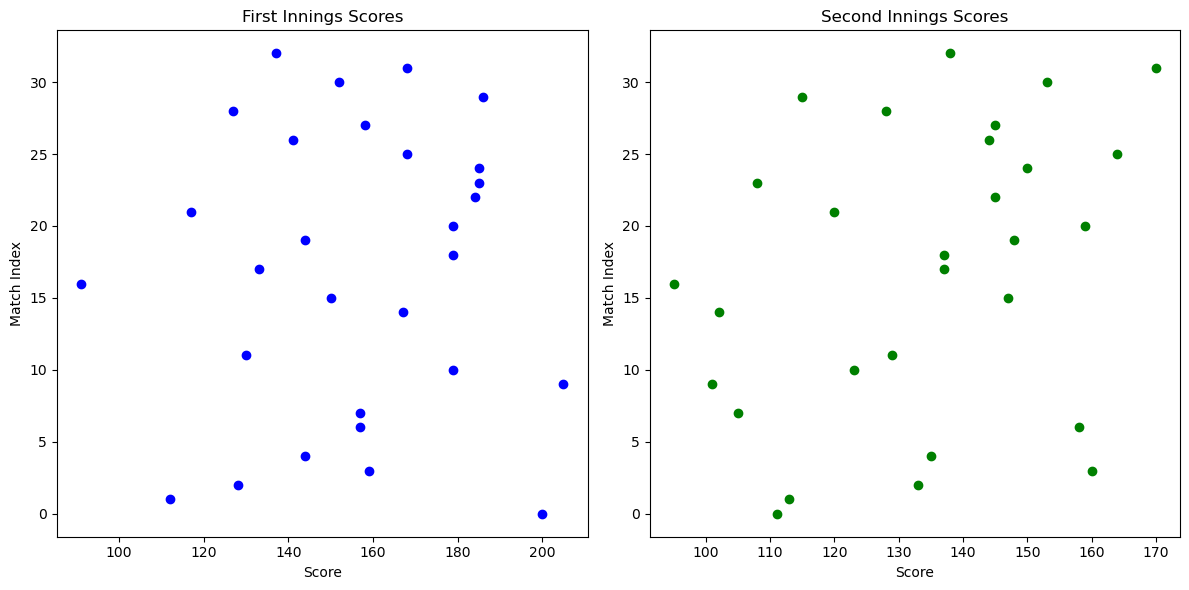

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First innings scores subplot
axes[0].scatter(data['first innings score'], data.index, marker='o', color='blue')
axes[0].set_title('First Innings Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Match Index')

# Second innings scores subplot
axes[1].scatter(data['second innings score'], data.index, marker='o', color='green')
axes[1].set_title('Second Innings Scores')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Match Index')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Analysis of Distribution of First and Second Innings Wickets:



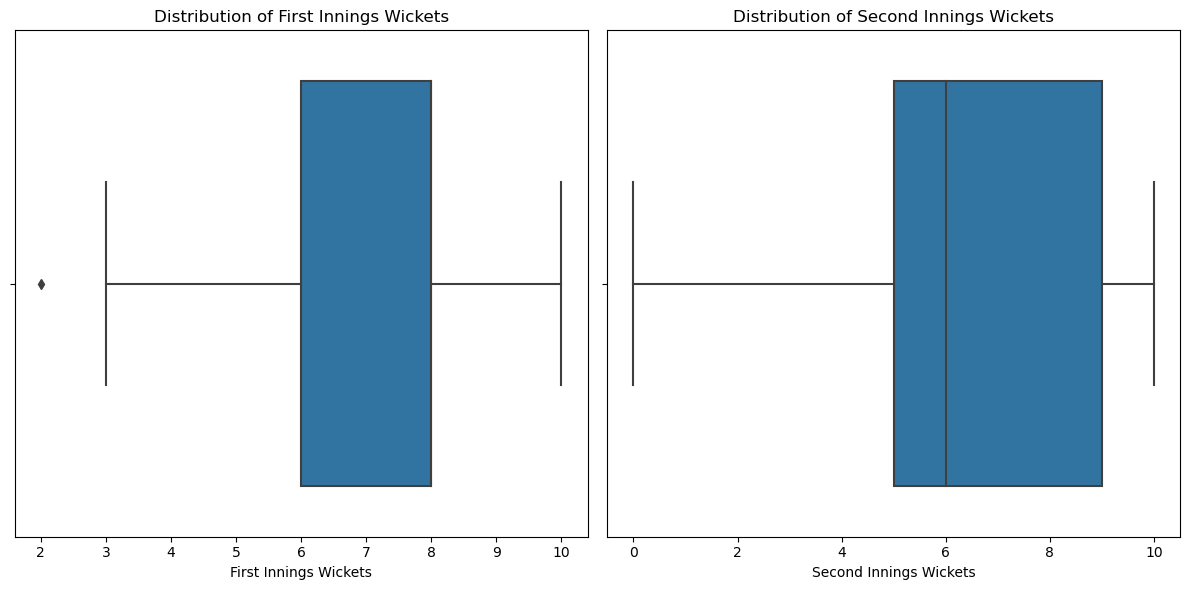

In [16]:
# Create subplots for side-by-side box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for First Innings Wickets
sns.boxplot(data=data, x='first innings wickets', ax=axes[0])
axes[0].set_title('Distribution of First Innings Wickets')
axes[0].set_xlabel('First Innings Wickets')

# Box plot for Second Innings Wickets
sns.boxplot(data=data, x='second innings wickets', ax=axes[1])
axes[1].set_title('Distribution of Second Innings Wickets')
axes[1].set_xlabel('Second Innings Wickets')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Analysis of First and Second Innings Wickets:

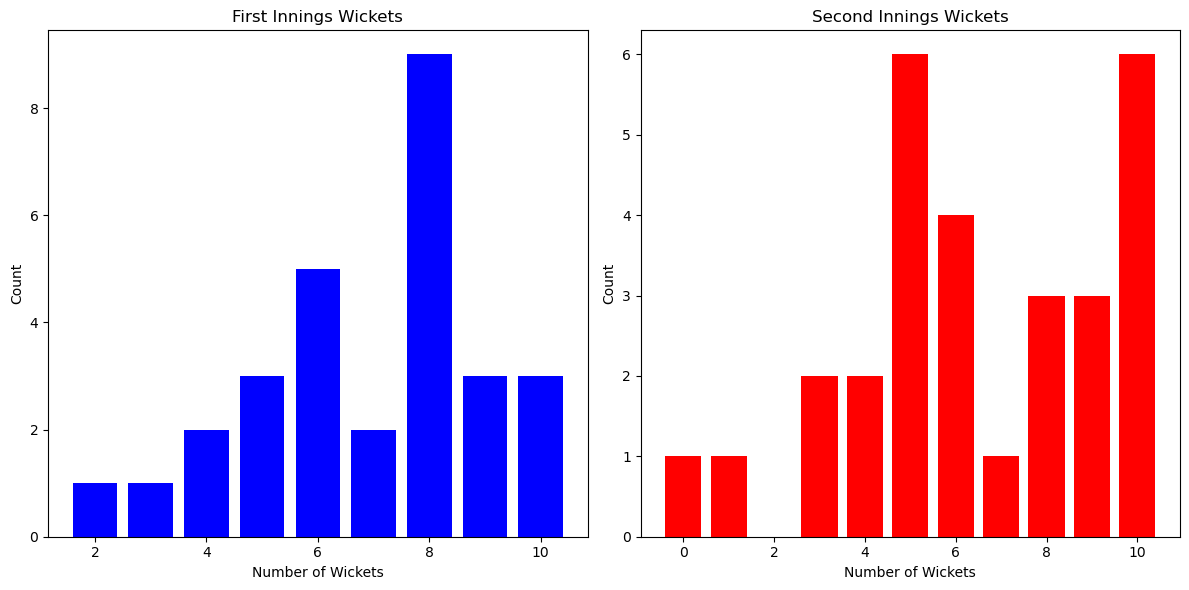

In [17]:
# First Innings Wickets data
first_innings_wickets = data['first innings wickets'].value_counts()

# Second Innings Wickets data
second_innings_wickets = data['second innings wickets'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the bar chart for First Innings Wickets
axes[0].bar(first_innings_wickets.index, first_innings_wickets.values, color='blue')
axes[0].set_xlabel('Number of Wickets')
axes[0].set_ylabel('Count')
axes[0].set_title('First Innings Wickets')

# Plotting the bar chart for Second Innings Wickets
axes[1].bar(second_innings_wickets.index, second_innings_wickets.values, color='red')
axes[1].set_xlabel('Number of Wickets')
axes[1].set_ylabel('Count')
axes[1].set_title('Second Innings Wickets')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Analysis of Matches Won by Runs or Wickets:

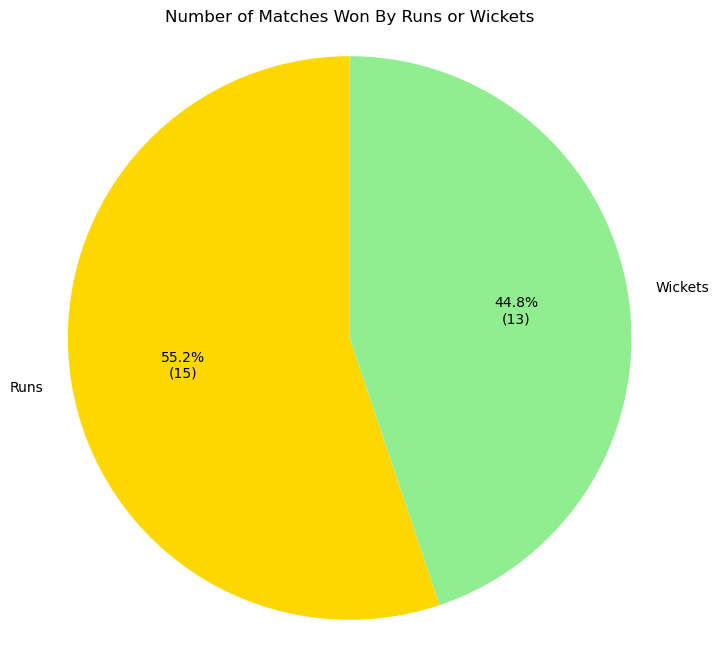

In [18]:
# Count the number of matches won by runs or wickets
outcome_counts = data['won by'].value_counts()

# Create a light color palette
colors = ['#FFD700', '#90EE90', '#87CEEB', '#FFB6C1', '#D3D3D3']

# Create a pie chart of the number of matches won by runs or wickets
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*len(data))})",
        startangle=90, colors=colors)
plt.title('Number of Matches Won By Runs or Wickets')
plt.axis('equal')
plt.show()

# Observation:
**It is observed that teams won the majority of matches in the T20 World Cup 2022 based on runs rather than wickets.**

# Analysis of Top Scorers in T20 World Cup 2022:

In [19]:
figure = px.bar(data, 
                x=data["top scorer"], 
                y = data["highest score"], 
                color = data["highest score"],
                title="Top Scorers in T20 World Cup 2022")
figure.show()

# Observation:
**It is observed that Virat Kohli is one of the top scorers in the T20 World Cup 2022.**

# Analysis of Top Bowlers in T20 World Cup 2022:

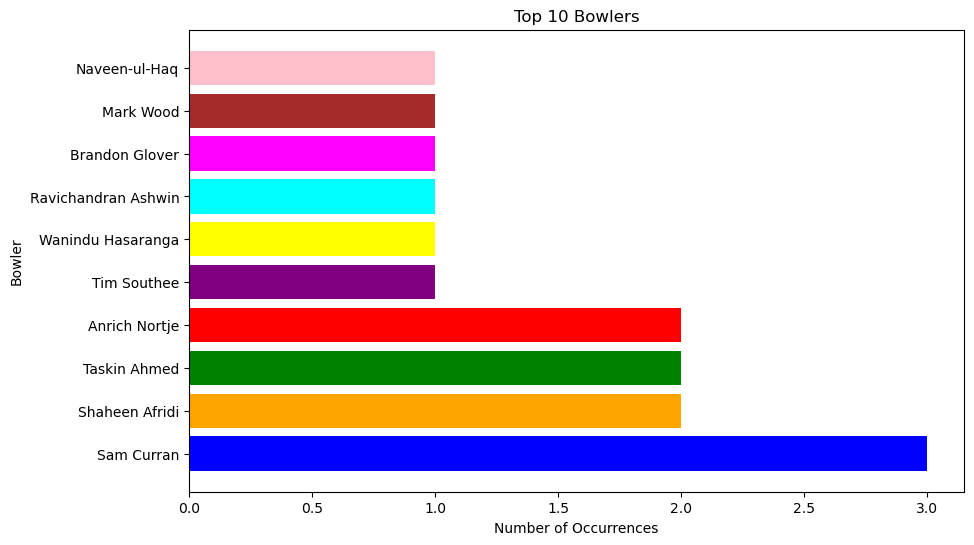

In [20]:
# Top bowlers data
top_bowlers = data['best bowler'].value_counts().head(10)

# Create a custom color palette
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'pink']

# Create the horizontal bar chart with custom colors
plt.figure(figsize=(10, 6))
plt.barh(top_bowlers.index, top_bowlers.values, color=colors)

# Add labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers')

# Display the plot
plt.show()

# Observation:
**It is observed that Sam Curran has been one of the standout bowlers in the T20 World Cup 2022.**

# Analysis of "Man of the Match" Awards:

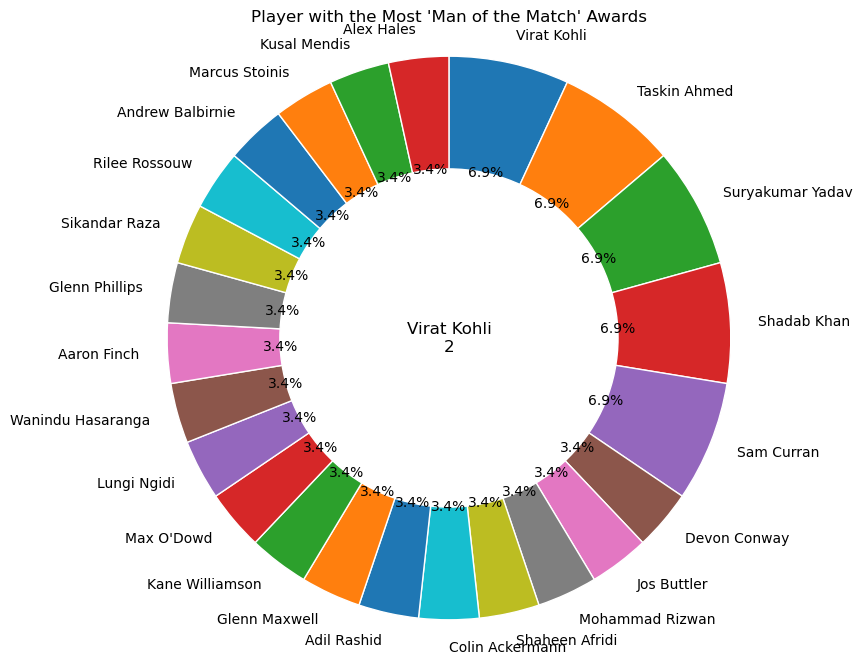

In [21]:
# Count the number of "Man of the Match" awards for each player
man_of_match_counts = data['player of the match'].value_counts()

# Get the player with the most "Man of the Match" awards
most_awards_player = man_of_match_counts.idxmax()
most_awards_count = man_of_match_counts.max()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(man_of_match_counts, labels=man_of_match_counts.index, startangle=90, counterclock=False,
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Add a central circle displaying the player with the most awards
central_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(central_circle)
plt.text(0, 0, f"{most_awards_player}\n{most_awards_count}", ha='center', va='center', fontsize=12)

# Set aspect ratio to equal to make it a circular donut
plt.axis('equal')

# Set the title of the chart
plt.title("Player with the Most 'Man of the Match' Awards")

# Display the donut chart
plt.show()

# Analysis of "Number of Toss Wins for Each Team":

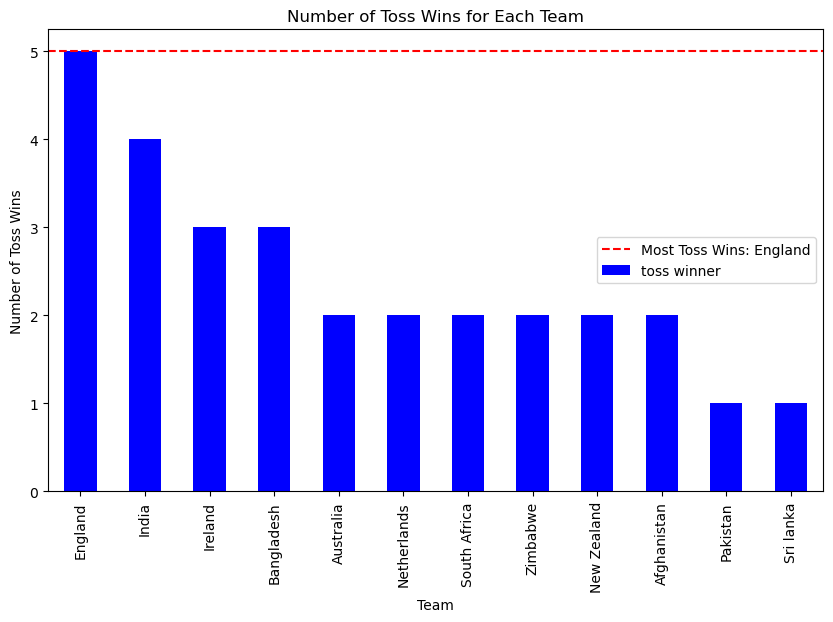

In [22]:
# Count the number of toss wins for each team
toss_wins = data['toss winner'].value_counts()

# Get the team with the most toss wins
team_with_most_toss_wins = toss_wins.idxmax()

# Create a bar plot for toss wins
plt.figure(figsize=(10, 6))
toss_wins.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Team')
plt.ylabel('Number of Toss Wins')
plt.title('Number of Toss Wins for Each Team')

# Highlight the team with the most toss wins
plt.axhline(y=toss_wins[team_with_most_toss_wins], color='red', linestyle='--',
            label=f'Most Toss Wins: {team_with_most_toss_wins}')

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Observation:
**It is observed that the team with the most toss wins is England with 5 toss wins.**

# Analysis of "Ratio of Teams Choosing Field or Bat After Winning the Toss": 

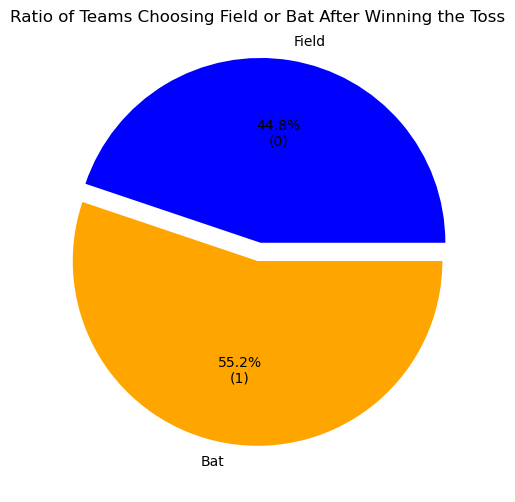

In [23]:
# Clean up leading and trailing spaces in the 'toss decision' column
data['toss decision'] = data['toss decision'].str.strip()

# Count the number of times teams chose to bat or field after winning the toss
decision_counts = data[data['toss decision'].isin(['Bat', 'Field'])]['toss decision'].value_counts()

# Calculate the ratio of teams choosing to field or bat
Field_ratio = decision_counts['Field'] / decision_counts.sum()
Bat_ratio = decision_counts['Bat'] / decision_counts.sum()

# Create a pie chart for the field and bat ratios
labels = ['Field', 'Bat']
ratios = [Field_ratio, Bat_ratio]
colors = ['blue', 'orange']
explode = [0.1, 0]  # To highlight the 'Field' slice

plt.figure(figsize=(8, 6))
plt.pie(ratios, labels=labels, colors=colors, explode=explode,
        autopct=lambda pct: '{:.1f}%\n({})'.format(pct, int(round(pct * sum(ratios) / 100.0))))

# Add title to the plot
plt.title('Ratio of Teams Choosing Field or Bat After Winning the Toss')

# Display the plot
plt.show()

# Observation:
**It is observed that after winning the toss, teams have mostly chosen to bat in the T20 World Cup 2022.**

# Analysis of "Number of Matches Won by Toss Decision": 

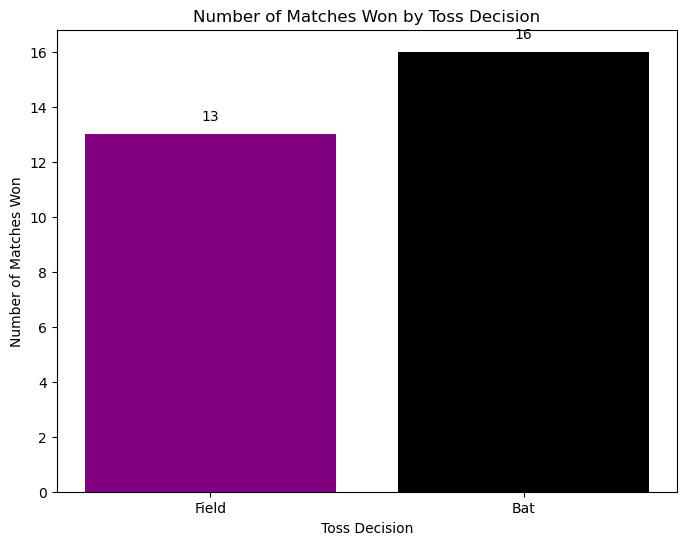

In [24]:
# Clean up leading and trailing spaces in the 'toss decision' column
data['toss decision'] = data['toss decision'].str.strip()

# Filter the data to include only matches with a valid toss decision
valid_matches = data[data['toss decision'].isin(['Bat', 'Field'])]

# Count the number of matches won by teams choosing to field or bat first
matches_won_field = valid_matches[valid_matches['winner'] == valid_matches['team2']]
matches_won_bat = valid_matches[valid_matches['winner'] == valid_matches['team1']]

# Get the count of matches won by choosing to field or bat
field_wins = len(matches_won_field)
bat_wins = len(matches_won_bat)

# Create the grouped bar chart
categories = ['Field', 'Bat']
wins = [field_wins, bat_wins]
colors = ['purple', 'black']

plt.figure(figsize=(8, 6))
plt.bar(categories, wins, color=colors)
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches Won')
plt.title('Number of Matches Won by Toss Decision')

# Add data labels to the bars
for i, win_count in enumerate(wins):
    plt.text(i, win_count + 0.5, str(win_count), ha='center')

plt.show()

# Observation:
**It is observed that among the matches won by teams after winning the toss, the ratio of teams choosing to bat first is higher.**

# Analysis of "Best Stadiums to Bat First or Chase":

In [25]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Add a trace for the first innings runs
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["first innings score"],
    name='First Innings Runs',
    marker_color='blue'
))

# Add a trace for the second innings runs
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["second innings score"],
    name='Second Innings Runs',
    marker_color='red'
))

# Set the layout properties of the figure
fig.update_layout(
    barmode='group',  # Group the bars side by side
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    title="Best Stadiums to Bat First or Chase"  # Set the title of the plot
)

# Show the figure
fig.show()

# Observation:
**It is observed that the highest first innings score was achieved at the SCG (Sydney Cricket Ground), while the highest score while chasing was recorded at Adelaide Oval.**

# Analysis of "Best Stadiums to Ball First or Defend":

In [26]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Add a trace for the first innings wickets
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["first innings wickets"],
    name='First Innings Wickets',
    marker_color='blue'
))

# Add a trace for the second innings wickets
fig.add_trace(go.Bar(
    x=data["venue"],
    y=data["second innings wickets"],
    name='Second Innings Wickets',
    marker_color='red'
))

# Set the layout properties of the figure
fig.update_layout(
    barmode='group',  # Group the bars side by side
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    title="Best Stadiums to Ball First or Defend"  # Set the title of the plot
)

# Show the figure
fig.show()

# Observation:
**It is observed that the highest number of wickets in the first innings were taken at Adelaide Oval, while the highest number of wickets in the second innings were taken at SCG (Sydney Cricket Ground).**

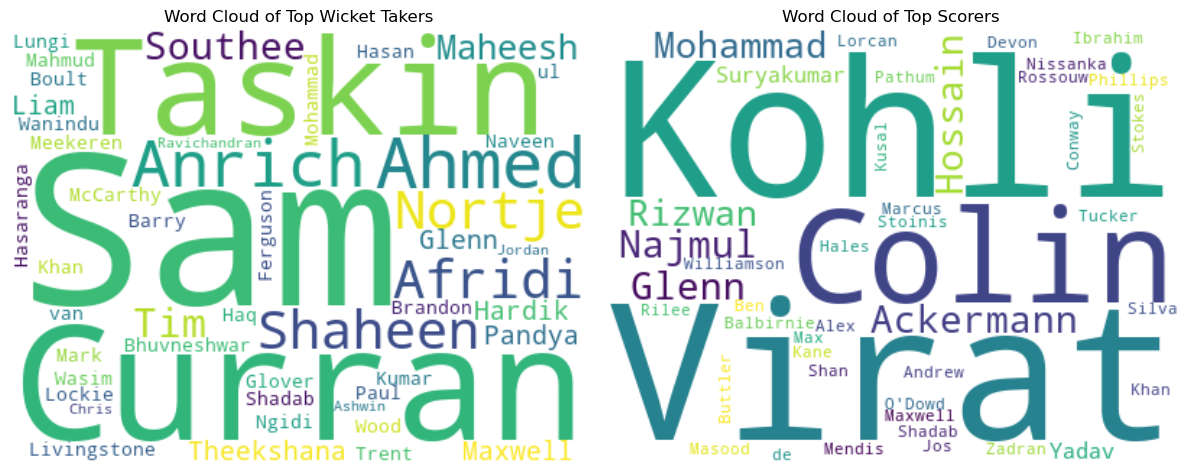

In [27]:
# Extract the top ticket takers column
top_ticket_takers = data['best bowler'].dropna()

# Join all top ticket takers into a single string
text = ' '.join(top_ticket_takers)

# Generate the word cloud for top ticket takers
wordcloud_ticket_takers = WordCloud(width=400, height=300, background_color='white').generate(text)

# Extract the top scorers column
top_scorers = data['top scorer'].dropna()

# Join all top scorers into a single string
text = ' '.join(top_scorers)

# Generate the word cloud for top scorers
wordcloud_scorers = WordCloud(width=400, height=300, background_color='white').generate(text)

# Create a combined plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the word cloud for top ticket takers
axes[0].imshow(wordcloud_ticket_takers, interpolation='bilinear')
axes[0].set_title('Word Cloud of Top Wicket Takers')
axes[0].axis('off')

# Plot the word cloud for top scorers
axes[1].imshow(wordcloud_scorers, interpolation='bilinear')
axes[1].set_title('Word Cloud of Top Scorers')
axes[1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Thanks for checking out my project!**

**I'm Muhammad Rayyan, and I appreciate your views.**


**Your feedback matters, so please leave a like 👍 and share your thoughts in the comments.**

**Stay tuned for future updates as I continue to enhance this project🚀😊**

**Thank you! ❤️**

![the end](https://www.freepnglogos.com/uploads/the-end-png/the-end-the-black-dahlia-the-sowden-house-foundation-0.png)